In [44]:
import pandas as pd
import numpy as np
from IPython.display import display 
import altair as alt
alt.renderers.enable('default')
import matplotlib.pyplot as plt
plt.close('all')

In [ ]:
# Run the following lines in the terminal if package is not installed:
# python (or py) -m pip install altair
# python (or py) -m pip install matplotlib

In [36]:
# Intial data loading, cleaning and viewing

data = pd.read_csv(r"Data\bank.csv", sep=';') 
print(f"Successfully loaded data: {data.shape[0]} rows, {data.shape[1]} columns")
print(f"Initial columns: {data.columns.tolist()}")

data_copy = data.copy()

data_copy.columns = data_copy.columns.str.lower().str.replace(' ', '_', regex=False).str.replace('[^0-9a-zA-Z_]', '', regex=True)

print("\nSample of cleaned data (first few rows):")
display(data_copy.head(5)) # Just used for debugging to check what the DataFrame look like 

# Side note, if we want to change data types, we can do so here. For example:
# data_copy['age'] = pd.to_numeric(data_copy['age'], errors='coerce).astype('object')

print(f"\nData types after cleaning:\n{data_copy.dtypes}") # Show what the data types of the columnds are after cleaning 
print(f"\nFinal columns available for use: {data_copy.columns.tolist()}")

Successfully loaded data: 4521 rows, 17 columns
Initial columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Sample of cleaned data (first few rows):


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no



Data types after cleaning:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Final columns available for use: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


<Axes: title={'center': 'Age vs Balance Scatter Plot'}, xlabel='age', ylabel='balance'>

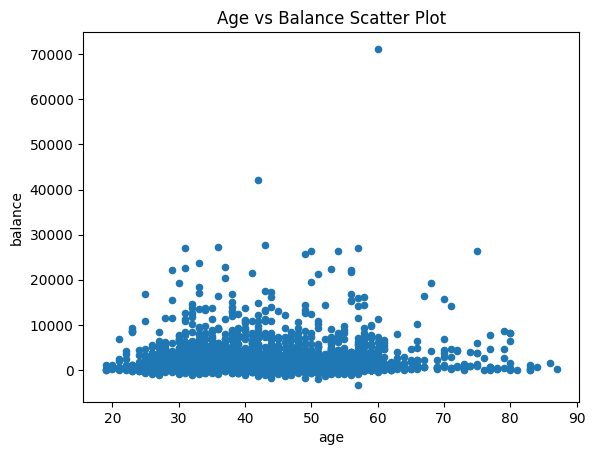

In [55]:
# Basic graph just for test 

data_copy.plot.scatter(x='age', y='balance', title='Age vs Balance Scatter Plot')